In [1]:
using ITensors 
using Plots
using Measurements   
using DelimitedFiles 

In [3]:
# lattice_large - lattice_small = 2 
function GrossNeveu(L::Int64,N::Int64,m::Float64,G²::Float64)
    l = L-2;
    sites = siteinds("Fermion",L)
    ampoₗ = OpSum()
    ampoₛ = OpSum()
    # Large Lattice 
    for j in 1:L-N
        ampoₗ -= 1im,"C",j,"Cdag",j+N
        ampoₗ += 1im,"C",j+N,"Cdag",j
    end
    for j in 1:N:L-N
        ampoₗ += (G²/2),"C * Cdag",j
    end
    for j in 1:L
        ampoₗ += (m*(-1)^j),"C * Cdag",j
    end
    Hₗ = MPO(ampoₗ, sites)
    ψₗ₀ = randomMPS(sites,100)
    ######################################
    ## small lattice 
    for j in 1:l-N
        ampoₛ -= 1im,"C",j,"Cdag",j+N
        ampoₛ += 1im,"C",j+N,"Cdag",j
    end
    for j in 1:N:l-N
        ampoₛ += (G²/2),"C * Cdag",j
    end
    for j in 1:l
        ampoₛ += (m*(-1)^j),"C * Cdag",j 
    end
    Hₛ = MPO(ampoₛ,sites[1:l])
    ψₛ₀ = randomMPS(sites[1:l],100)
    sweep = Sweeps([
         "maxdim" "mindim" "cutoff" 
          200      10      1e-10    
          500      10      1e-12    
          900      20      1e-14    
#           700      30      1e-16    
#           1000     50      1e-18
         ])
    eₗ₀,ψₗ = dmrg(Hₗ,ψₗ₀,sweep,outputlevel=1)
    eₛ₀,ψₛ = dmrg(Hₛ,ψₛ₀,sweep,outputlevel=1)
    # error computation
    nrm = norm(inner(Hₛ,ψₛ,Hₛ,ψₛ) - inner(ψₛ',Hₛ,ψₛ)^2)/norm(inner(ψₛ',Hₛ,ψₛ))
    #  Overlap computation
    v1 = ITensor(sites[l+1]) 
    for j in 1:size(v1)[1]
        v1[j] = 1/sqrt(2)
    end
    v2 = ITensor(sites[L])
    for j in 1:size(v2)[1]
        v2[j] = 1/sqrt(2)
    end
    v = ITensor(1.0)
    for j in 1:l
        v = v*dag(ψₛ[j])*ψₗ[j]
    end
    v = v*v1*ψₗ[l+1]
    v = v*v2*ψₗ[L]
    return inner(v,v), norm(v), nrm 
end

GrossNeveu (generic function with 1 method)

In [29]:
result_inner, result_norm, result_error = nothing, nothing, nothing
result_inner2, result_norm2, result_error2 = nothing, nothing, nothing
error_bar = nothing

In [30]:
# L::Integer, N::Integer,G²::Float64,m::Float64,sw::Integer
result_inner = Vector{ComplexF64}();
result_norm = Vector{ComplexF64}();
result_error = Vector{ComplexF64}();

In [31]:
# GrossNeveu(L,N,m,G²)
for j in 4:18
    println(j)
    nnr , nrm, err = GrossNeveu(j,1,0.8,1.5); # change BD --> 100
    if err < 1e-6
        push!(result_inner, nnr);
        push!(result_norm, nrm);
        push!(result_error, err);
    else
        nnr , nrm, err = GrossNeveu(j,1,0.8,1.5); # change BD --> 100
        push!(result_inner, nnr);
        push!(result_norm, nrm);
        push!(result_error, err);
    end
end

4
After sweep 1 energy=-1.4422338521232552  maxlinkdim=8 maxerr=0.00E+00 time=0.004
After sweep 2 energy=-1.4663918456451488  maxlinkdim=4 maxerr=0.00E+00 time=0.006
After sweep 3 energy=-1.4664794939854164  maxlinkdim=4 maxerr=0.00E+00 time=0.006
After sweep 1 energy=-0.7110227077282402  maxlinkdim=2 maxerr=0.00E+00 time=0.002
After sweep 2 energy=-0.7115656304347723  maxlinkdim=2 maxerr=0.00E+00 time=0.002
After sweep 3 energy=-0.7115656905983706  maxlinkdim=2 maxerr=0.00E+00 time=0.002
5
After sweep 1 energy=-2.350332651455645  maxlinkdim=10 maxerr=5.91E-20 time=0.010
After sweep 2 energy=-2.400465589702804  maxlinkdim=4 maxerr=0.00E+00 time=0.015
After sweep 3 energy=-2.403491315833401  maxlinkdim=4 maxerr=0.00E+00 time=0.012
After sweep 1 energy=-1.5848268759717214  maxlinkdim=4 maxerr=0.00E+00 time=0.006
After sweep 2 energy=-1.5984311093697459  maxlinkdim=2 maxerr=0.00E+00 time=0.007
After sweep 3 energy=-1.5985306658792124  maxlinkdim=2 maxerr=0.00E+00 time=0.008
6
After sweep 

After sweep 2 energy=-4.677412205865812  maxlinkdim=51 maxerr=7.47E-13 time=0.065
After sweep 3 energy=-4.677953352750042  maxlinkdim=57 maxerr=7.95E-15 time=0.078
After sweep 1 energy=-5.478097054935432  maxlinkdim=89 maxerr=9.15E-11 time=0.185
After sweep 2 energy=-5.483199739416032  maxlinkdim=77 maxerr=9.68E-13 time=0.202
After sweep 3 energy=-5.483623351639365  maxlinkdim=88 maxerr=9.43E-15 time=0.202
After sweep 1 energy=-4.665468198648585  maxlinkdim=56 maxerr=6.91E-11 time=0.075
After sweep 2 energy=-4.676511048726427  maxlinkdim=54 maxerr=8.54E-13 time=0.065
After sweep 3 energy=-4.677874609937323  maxlinkdim=59 maxerr=6.13E-15 time=0.088
15
After sweep 1 energy=-6.421645191813805  maxlinkdim=99 maxerr=9.93E-11 time=0.406
After sweep 2 energy=-6.430032949687486  maxlinkdim=96 maxerr=9.73E-13 time=0.316
After sweep 3 energy=-6.431582824857189  maxlinkdim=117 maxerr=9.18E-15 time=0.341
After sweep 1 energy=-5.6037949091394195  maxlinkdim=63 maxerr=5.63E-11 time=0.153
After sweep

In [32]:
site_number = [x for x in 1:length(result_inner)];
result_inner2 = real(result_inner);
result_norm2 = real(result_norm);
result_error2 = real(result_error);

In [33]:
error_bar = [sqrt(x) for x in result_error2[1:end]];

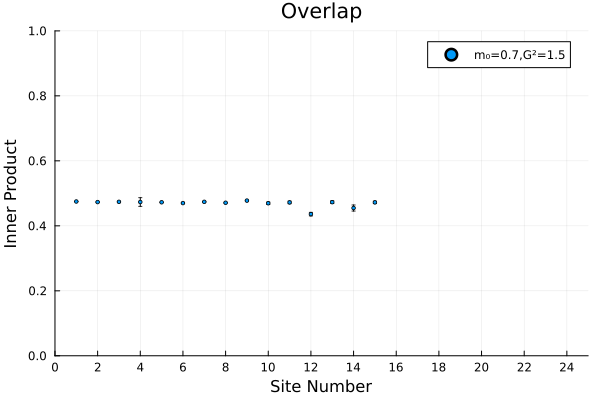

In [37]:
scatter(site_number, 
    result_norm2.± error_bar/2, 
    xlim=(0,25),xticks=((0:2:27)), 
    ylim=(0.0,1), 
#     yticks=((0.40:0.01:0.50)),   
    markersize=2,
    xlabel="Site Number",
    ylabel="Inner Product",
    label="m₀=0.7,G²=1.5",
    title="Overlap")
# savefig("m07_4.svg")

In [49]:
# writedlm("m05_inner.txt",result_inner2)
# writedlm("m05_norm.txt",result_norm2)
# writedlm("m05_error.txt",result_error2)